<h1 style="text-align: center;">Desafío 2 - Rendimiento escolar</h1>
<p style="text-align: center;">Óscar Aguilera Badilla</p>

## Preliminares
### Decripción del problema
- Lo contactan de una escuela Portuguesa para generar un modelo que identifique aquellos alumnos que presentan un bajo desempeño académico, medido en el promedio final del año
escolar. Para ello le envían un archivo con registros sociodemográficos y conductuales de los alumnos de dos escuelas para perfilar a los estudiantes.
- De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntas asociadas a aspectos ambientales del alumno (de famrel a health) y ver si éstas se
pueden abstraer en categorías latentes.

### Objetivos
- Encontrar un modelo descriptivo que permita determinar perfilar a los estudiantes.
- Encontrar un modelo predictivo que permita determinar los promedios finales de los estudinates.

### Desarrollo
- Este desafío tiene tres vectores objetivo:
    - Las notas durante el primer semestre
    - Las notas durante el segundo semestre
    - El promedio final.
    El promedio final es el vector a precedir en el modelo.

- Preprosesamiento: 
    - Normalizar los datos respecto a los valores que indiquen valor nulo. (nulidade, sem validade, zero).
    - Determinar qué datos o qué columna eliminar en base a la cantidad de nulos.
    - Recodificar las variables binarias como 0 y 1 asignando el 1 a las categorías minoritarias.
    - Recodificar las variables nominales con más de dos categorías.
    - Cambio de tipos de variables mal ingresadas.    

- Modelo a utilizar: regresión lineal ya que el vector objetivo es una variable continua (notas de los estudiantes)
    - Se crearán 3 modelos, uno para notas del primer semestre, otro para el semestre 2 y la nota final.
- Determinar variables significativas:
    - Correr modelo de regresión lineal
    - Depurar las variables: Dejar variables significativas.
    - Error cuadrado medio.
    - Se simplifica el modelo, se entrena el modelo logistico con estas variables.
- Utilizar análisis factorial para reconocer las variables latentes.

-Entrenamiento:
    - Entrenamiento supervizado con división de data set para entrenamiento y pruebas.
- Revisión con puntaje de r cuadrado para ver el porcentaje de representación del modelo.
- Revisión modelo: puntaje f1, accuracy. 
- Evaluación del desempeño del modelo
- Matriz de confusión y luego se calcula la precisión para determinar qué tan bueno está el modelo y si hace lo que estamos necesitando.
- Variación del modelo para ajustar su desempeño.

### Librerías a usar

- pandas y numpy: para trabajar el dataframe, manejar y convertir los datos. Analizar a grandes rasgos la caracteristica de las variables.
- seaborn y matplotlib: Para obtener distintos gráficos que nos permitan analizar el comportamiento y correlación de las variables.
- statsmodel: analizar comportamiento estadístico, determinación de variables significativas y creación del modelo
- sklearn: librería de machine learning para entrenar el modelo descrito, estandarizar y utilización de métricas para evaluar calidad del modelo. 
    - Linear Regretion, r2_score, mean_square_error
- warning: Librería que permite eliminar mensajes no desedos respecto a las deprecación
- funciones propias: Archivo con funciones propias para automatizar procesos comunes.

In [ ]:
#manejo de datos
import pandas as pd
import numpy as np

#Graficas
import seaborn as sns
import matplotlib.pyplot as plt

#crear modelo de regresion lineal
import statsmodels.api as sm
import statsmodels.formula.api as smf

#entrenar el modelo
from sklearn.linear_model import LinearRegression

#metricas
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split  

#otras
import warnings
warnings.simplefilter("ignore")

#Funciones propias
import funciones_propias as fp

from sklearn.preprocessing import StandardScaler

- pandas - numpy = Se utilizara para el manejo de los datos, como por ejemplo para preprocesar
- seaborn - matplotlib.pyplot = Se utilizara para la creacion de graficos
- statsmodels = Se utilizara la creacion del modelo de regresion lineal
- train_test_split = Se utilizara para separar los datos en test y train
- LinearRegression = Se utilizara para entrenar un modelo logistico
- mean_squared_error - r2_score = Se utilziara para evaluar el modelo
- classification_report - roc_auc_score, roc_curve = Se utilizara para obtener las metricas de desempeño
- warnings = Se utilizara evitar avisos
- funciones_creadas = funciones que tengo que crear, para evitar repetir codigo

**Comentarios** ols para regresion lineal

In [ ]:
df = pd.read_csv("students.csv", sep ='|').drop(columns = ["Unnamed: 0"])
#df.astype({'age':int, 'goout':int,'health':int})
df.head(10)

school sex           age address famsize Pstatus Medu Fedu      Mjob  \
0     GP   F      nulidade       U     GT3       A    4    4   at_home   
1     GP   F          "17"       U     GT3       T    1    1   at_home   
2     GP   F          "15"       U     LE3       T    1    1   at_home   
3     GP   F          "15"       U     GT3       T    4    2    health   
4     GP   F  sem validade       U     GT3       T    3    3     other   
5     GP   M          "16"       U     LE3       T    4    3  services   
6     GP   M          "16"       U     LE3       T    2    2     other   
7     GP   F          "17"       U     GT3       A    4    4     other   
8     GP   M          "15"       U     LE3       A    3    2  services   
9     GP   M          "15"       U     GT3       T    3    4     other   

       Fjob  ... famrel freetime goout Dalc Walc health absences    G1  G2  G3  
0   teacher  ...      4        3   "4"    1    1    "3"        6     5   6   6  
1     other  ...      5        3   "3"    1    1    "3"        4     5   5   6  
2     other  ...      4        3   "2"    2    3    "3"       10  zero   8  10  
3  services  ...      3        2   "2"    1    1    "5"        2    15  14  15  
4     other  ...      4        3   "2"    1    2    "5"        4     6  10  10  
5     other  ...      5        4   "2"    1    2    "5"       10    15  15  15  
6     other  ...      4        4   "4"    1    1    "3"        0    12  12  11  
7   teacher  ...      4        1   "4"    1    1    "1"        6     6   5   6  
8     other  ...      4        2   "2"    1    1    "1"        0    16  18  19  
9     other  ...      5        5   "1"    1    1    "5"        0    14  15  15  

[10 rows x 33 columns]

**Comentario:** Parecia raro que solo aparecia G2 si habian mas variables numericas

## Hito 2

#### Datos nulos.

In [ ]:
df = df.replace(["nulidade", "sem validade", "zero"], [np.nan, np.nan, np.nan])

In [ ]:
for c in df.columns:
    cantidad_nulos, porcentaje_nulos = fp.nulos(df, c)
    print(f"La columna {c} tiene {cantidad_nulos} casos perdidos, que corresponden  al {round(porcentaje_nulos, 2)}%")

La columna school tiene 5 casos perdidos, que corresponden  al 1.27%
La columna sex tiene 3 casos perdidos, que corresponden  al 0.76%
La columna age tiene 4 casos perdidos, que corresponden  al 1.01%
La columna address tiene 2 casos perdidos, que corresponden  al 0.51%
La columna famsize tiene 4 casos perdidos, que corresponden  al 1.01%
La columna Pstatus tiene 6 casos perdidos, que corresponden  al 1.52%
La columna Medu tiene 3 casos perdidos, que corresponden  al 0.76%
La columna Fedu tiene 5 casos perdidos, que corresponden  al 1.27%
La columna Mjob tiene 6 casos perdidos, que corresponden  al 1.52%
La columna Fjob tiene 0 casos perdidos, que corresponden  al 0.0%
La columna reason tiene 4 casos perdidos, que corresponden  al 1.01%
La columna guardian tiene 4 casos perdidos, que corresponden  al 1.01%
La columna traveltime tiene 3 casos perdidos, que corresponden  al 0.76%
La columna studytime tiene 5 casos perdidos, que corresponden  al 1.27%
La columna failures tiene 5 casos per

In [ ]:
df = df.dropna()

In [ ]:
df["age"] = df["age"].str.replace('"', "").astype(int)
df["goout"] = df["goout"].str.replace('"', "").astype(int)
df["health"] = df["health"].str.replace('"', "").astype(int)


In [ ]:
def cambio_tipo_Variable(var):
    df[var] = df[var].astype('float64')

In [ ]:
cambio_tipo_Variable("G3")
cambio_tipo_Variable("G1")
cambio_tipo_Variable("age")
cambio_tipo_Variable("Medu")
cambio_tipo_Variable("Fedu")
cambio_tipo_Variable("traveltime")
cambio_tipo_Variable("studytime")
cambio_tipo_Variable("failures")
cambio_tipo_Variable("famrel")
cambio_tipo_Variable("freetime")
cambio_tipo_Variable("goout")
cambio_tipo_Variable("Dalc")
cambio_tipo_Variable("Walc")
cambio_tipo_Variable("health")
cambio_tipo_Variable("absences")#### Graficos para inspeccion visual de variables para recodificacion

#### Graficos para inspeccion visual de variables para recodificacion

In [ ]:
fp.plot_hist(df, "G1")

**Comentario:** En la variable G1, el minimo es 4 y el maximo 19, existe una concentracion entre 10 y casi los 12 que corresponde a quizas se concentro porque es la nota que obtiene la mayoria. La media y mediana se encuentran relativamente cerca, pero no en el centro de la curva. No estoy seguro si visualmente podria llegar a tender a una curva normal.

In [ ]:
fp.plot_hist(df, "G2")

**Comentario:** En la variable G2, el minimo es 0 y el maximo 19, existe una concentracion entre 13 y los 14 que corresponde a quizas se concentro porque es la nota que obtiene la mayoria, este aumento se puede deber porque en el segundo semestre aumentaron las notas buenas. La media y mediana se encuentran relativamente cerca, pero tambien estan cerca delde la curva. No tiende a una normal, porque existe una pequeña curva al comienzo.

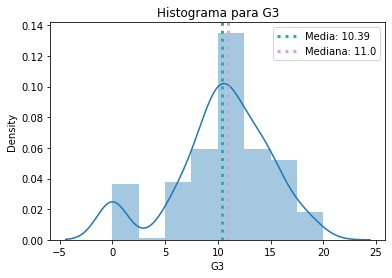

In [ ]:
fp.plot_hist(df, "G3")

**Comentario:** En la variable G3, el minimo es 0 y el maximo 120, existe una concentracion entre 10 y los 12 que corresponde a quizas se concentro porque es la nota que obtiene la mayoria, aumento la curtosis tambien. La media y mediana se encuentran relativamente cerca, pero tambien estan cerca delde la curva, siendo la media mas cercana. No tiende a una normal, porque existe una pequeña curva al comienzo.

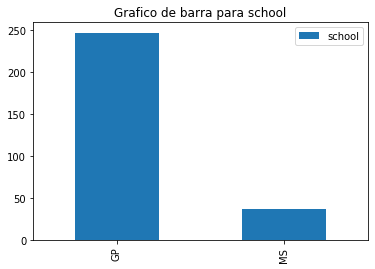

In [ ]:
fp.plot_freq(df,"school")

**Comentario:** La variable GP es la de mayor frecuencia, al recodificar esta se dejara como valor 0. Tiene muy pocas observaciones MS

In [ ]:
df["school"] = np.where(df["school"] == "MS", 1, 0)

In [ ]:
fp.plot_freq(df, "sex")

**Comentario:** La variable F es la de mayor frecuencia, al recodificar esta se dejara como valor 0. Tienen observaciones parecidas F y M

In [ ]:
df["sex"] = np.where(df["sex"] == "M", 1, 0)

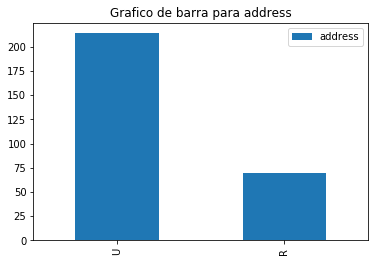

In [ ]:
fp.plot_freq(df, "address")

**Comentario:** La variable U es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria viven en zonas urbanas, asi que puede ser un colegio urbano, por eso hay menos rurales

In [ ]:
df["address"] = np.where(df["address"] == "R", 1, 0)

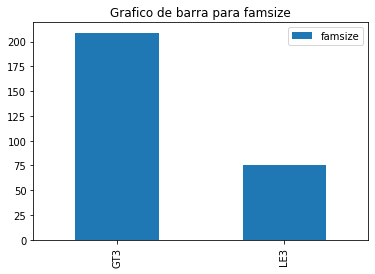

In [ ]:
fp.plot_freq(df, "famsize")

**Comentario:** La variable GT3 es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria viven en tiene familia de mayores a 3

In [ ]:
df["famsize"] = np.where(df["famsize"] == "LE3", 1, 0)

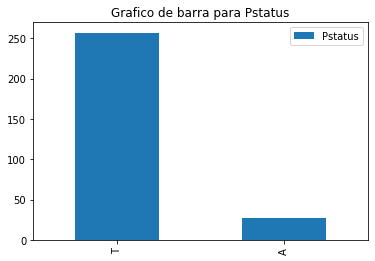

In [ ]:
fp.plot_freq(df, "Pstatus")

**Comentario:** La variable T es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria tiene padres viviendo juntos, muy pocos tienen padres separados

In [ ]:
df["Pstatus"] = np.where(df["Pstatus"] == "A", 1, 0)

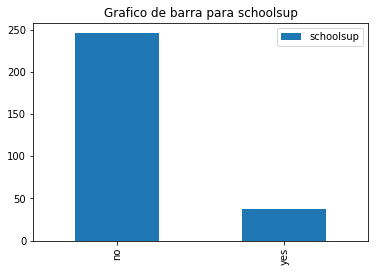

In [ ]:
fp.plot_freq(df, "schoolsup")       

**Comentario:** La variable no es la de mayor frecuencia, al recodificar esta se dejara como valor 0. Muy pocos tienen apoyo educacional del colegio

In [ ]:
df["schoolsup"] = np.where(df["schoolsup"] == "yes", 1, 0)

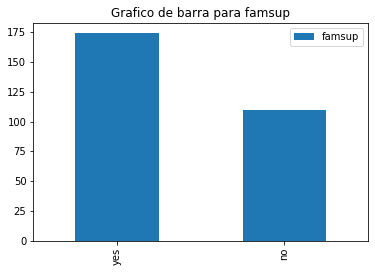

In [ ]:
fp.plot_freq(df, "famsup")

**Comentario:** La variable yes es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria tiene apoyo educacional de su familia, aunque la cifra de los que no, igual es importante

In [ ]:
df["famsup"] = np.where(df["famsup"] == "no", 1, 0)

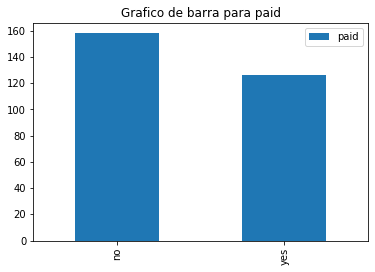

In [ ]:
fp.plot_freq(df, "paid")

**Comentario:** La variable no es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria no tiene clases particulas pagadas, pero existe una cifra considerable que si las tiene

In [ ]:
df["paid"] = np.where(df["paid"] == "yes", 1, 0)

In [ ]:
fp.plot_freq(df, "activities")

**Comentario:** La variable yes es la de mayor frecuencia, al recodificar esta se dejara como valor 0. Se encuentra casi parecidas ambas opciones

In [ ]:
df["activities"] = np.where(df["activities"] == "no", 1, 0)

In [ ]:
fp.plot_freq(df, "nursery")

**Comentario:** La variable yes es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria si fue a la guarderia

In [ ]:
df["nursery"] = np.where(df["nursery"] == "no", 1, 0)

In [ ]:
fp.plot_freq(df, "higher")

**Comentario:** La variable yes es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria si piensa seguir estudiando, muy pocos tienen pensado no seguir

In [ ]:
df["higher"] = np.where(df["higher"] == "no", 1, 0)

In [ ]:
fp.plot_freq(df, "internet")

**Comentario:** La variable yes es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria si tiene internet, son parecidos los valores a los de zona urbana y rural, no se si tendra relacion.

In [ ]:
df["internet"] = np.where(df["internet"] == "no", 1, 0)

In [ ]:
fp.plot_freq(df, "romantic")

**Comentario:** La variable no es la de mayor frecuencia, al recodificar esta se dejara como valor 0. La mayoria no se en una relacion romantica

In [ ]:
df["romantic"] = np.where(df["romantic"] == "yes", 1, 0)

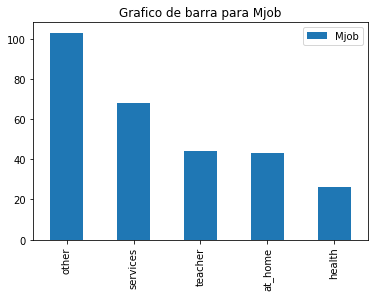

In [ ]:
fp.plot_freq(df, "Mjob")

**Comentario:** La variable other es la de mayor frecuencia, al recodificar esta se dejara fuera. La mayoria de las mujeres tienen un trabajo que cae en la clasificacion other, y la menor pertencen al area de salud

In [ ]:
df["Mteacher"] = np.where(df["Mjob"] == "teacher", 1, 0)
df["Mhealth"] = np.where(df["Mjob"] == "health", 1, 0)
df["Mservices"] = np.where(df["Mjob"] == "services", 1, 0)
df["Mat_home"] = np.where(df["Mjob"] == "at_home", 1, 0)

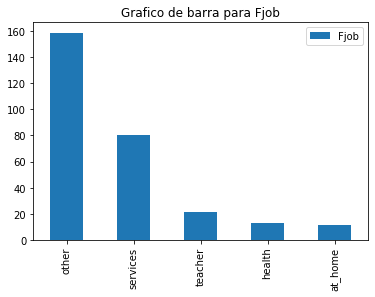

In [ ]:
fp.plot_freq(df, "Fjob")

**Comentario:** La variable other es la de mayor frecuencia, al recodificar esta se dejara fuera. Al igual que las mujeresLa mayoria de los hombres tienen un trabajo que cae en la clasificacion other, y la menor pertencen al area de en casa

In [ ]:
df["Fteacher"] = np.where(df["Fjob"] == "teacher", 1, 0)
df["Fhealth"] = np.where(df["Fjob"] == "health", 1, 0)
df["Fservices"] = np.where(df["Fjob"] == "services", 1, 0)
df["Fat_home"] = np.where(df["Fjob"] == "at_home", 1, 0)

In [ ]:
fp.plot_freq(df, "reason")

**Comentario:** La variable coursee es la de mayor frecuencia, al recodificar esta se dejara fuera. La mayoria escoge la escuela por el tipo de cursos que ofrece

In [ ]:
df["R_home"] = np.where(df["reason"] == "home", 1, 0)
df["R_reputation"] = np.where(df["reason"] == "reputation", 1, 0)
df["R_other"] = np.where(df["reason"] == "other", 1, 0)

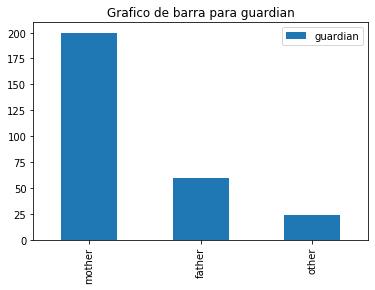

In [ ]:
fp.plot_freq(df, "guardian")

**Comentario:** La variable mother es la de mayor frecuencia, al recodificar esta se dejara fuera. La mayoria de las madres son los apoderados de los alumnos

In [ ]:
df["G_father"] = np.where(df["guardian"] == "father", 1, 0)
df["G_other"] = np.where(df["guardian"] == "other", 1, 0)

In [ ]:
fp.plot_hist(df, "age")

**Comentario:** En la variable age, el minimo es 15 y el maximo 21, existe una concentracion entre 17 y 18 que corresponde a quizas se concentro porque es la nota que obtiene la mayoria. Puede corresponder a alumnos de secundaria o enseñanza media

In [ ]:
fp.plot_hist(df, "Medu")

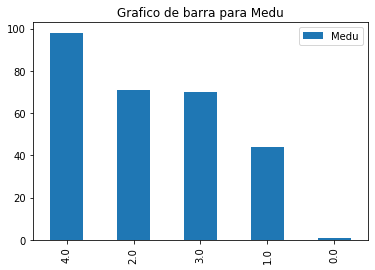

In [ ]:
fp.plot_freq(df, "Medu")

**Comentario:** En la variable Medu, el minimo es 0 y el maximo 4, existe una concentracion a nivel del 4.

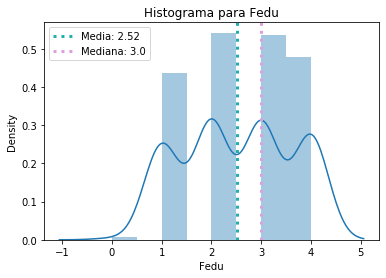

In [ ]:
fp.plot_hist(df, "Fedu")

In [ ]:
fp.plot_freq(df, "Fedu")

**Comentario:** En la variable Fedu, el minimo es 0 y el maximo 4, existe una concentracion entre 2 y 3, tiene un media mas baja que Medu

In [ ]:
fp.plot_hist(df, "traveltime")

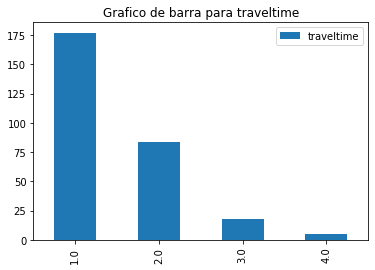

In [ ]:
fp.plot_freq(df, "traveltime")

**Comentario:** En la variable traveltime, el minimo es 1 y el maximo 4, existe una concentracion en el nivel 1, la mayoria vive mas cerca del colegio.

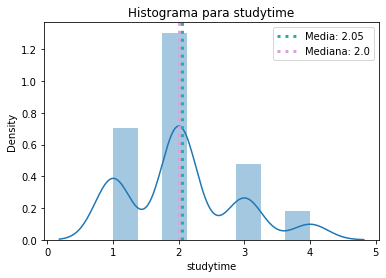

In [ ]:
fp.plot_hist(df, "studytime")

**Comentario:** En la variable traveltime, el minimo es 1 y el maximo 4, existe una concentracion en el nivel 2, la mayoria estudia entre 2 y 5 horas.

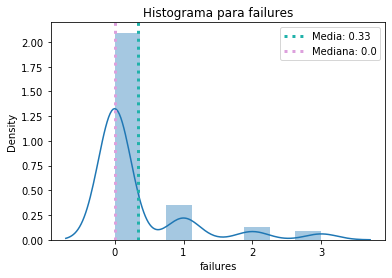

In [ ]:
fp.plot_hist(df, "failures")

**Comentario:** En la variable failures, el minimo es 0 y el maximo 3, existe una concentracion en el nivel 0, la mayoria no tiene clases reprobadas

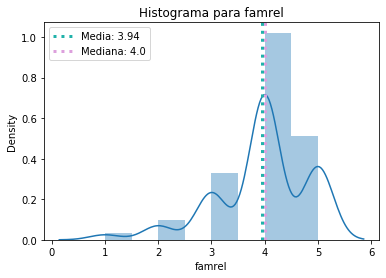

In [ ]:
fp.plot_hist(df, "famrel")

**Comentario:** En la variable famrel, el minimo es 1 y el maximo 5, existe una concentracion en el nivel 4, la mayoria tiene buenas relaciones familiares

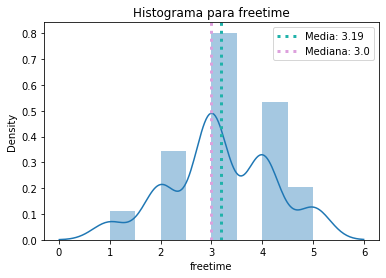

In [ ]:
fp.plot_hist(df, "freetime")

**Comentario:** En la variable freetime, el minimo es 1 y el maximo 5, existe una concentracion en el nivel 3.

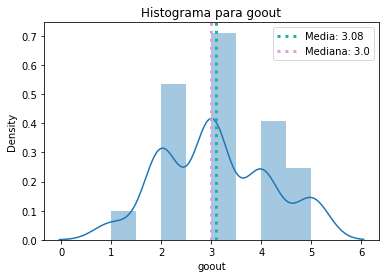

In [ ]:
fp.plot_hist(df, "goout")

**Comentario:** En la variable traveltime, el minimo es 1 y el maximo 5, existe una concentracion en el nivel 3, un nivel intermedio de salidas con amigos

In [ ]:
fp.plot_hist(df, "Dalc")

**Comentario:** En la variable Dalc, el minimo es 1 y el maximo 5, existe una concentracion en el nivel 1, la mayoria tiene un bajo consumo de alcohol en la semana

In [ ]:
fp.plot_hist(df, "Walc")

**Comentario:** En la variable Walc, el minimo es 1 y el maximo 5, existe una concentracion en el nivel 1, la mayoria tiene un bajo consumo de alcohol en los fin de semana semana, pero existe un aumento en comparacion a los dias de semana

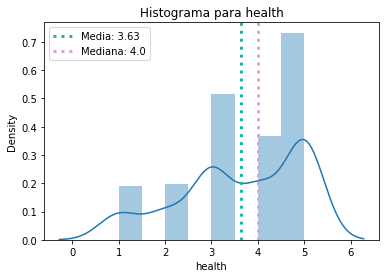

In [ ]:
fp.plot_hist(df, "health")

**Comentario:** En la variable Dalc, el minimo es 1 y el maximo 5, existe una concentracion en el nivel 2, la mayoria tiene un buen estado de salud

In [ ]:
df["absences"].describe()

count    284.000000
mean       5.588028
std        8.156335
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       75.000000
Name: absences, dtype: float64

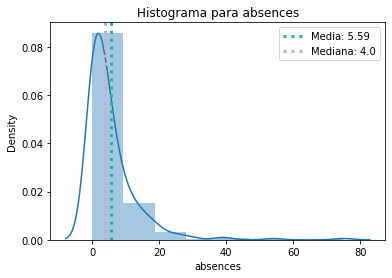

In [ ]:
fp.plot_hist(df, "absences")

**Comentario:** En la variable Dalc, el minimo es 0 y el maximo 75, la mayoria tiene pocas ausencias escolares

*Analisis de variable vector vs las demas variables* (solo dejare las que me llaman la atencion)

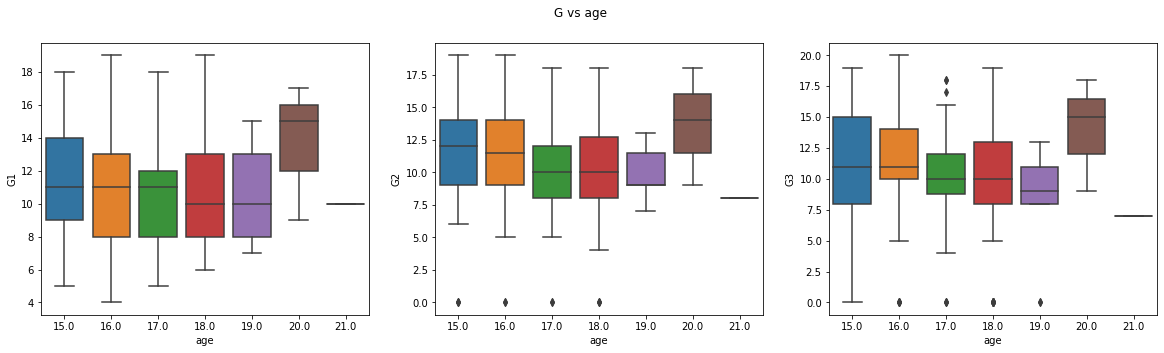

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs age')

sns.boxplot(ax=axes[0], data=df, x="age", y="G1")
sns.boxplot(ax=axes[1], data=df, x="age", y="G2")
sns.boxplot(ax=axes[2], data=df, x="age", y="G3")

**Comentario:** Existe un aumento en G2, porque varios tuvieron que cumplir años el segundo semestre

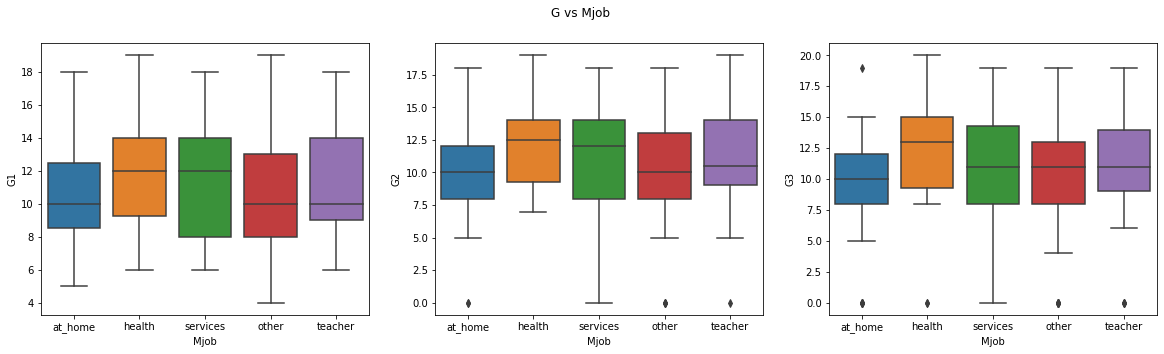

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs Mjob')

sns.boxplot(ax=axes[0], data=df, x="Mjob", y="G1")
sns.boxplot(ax=axes[1], data=df, x="Mjob", y="G2")
sns.boxplot(ax=axes[2], data=df, x="Mjob", y="G3")

**Comentario:** Los alumnos que tienen madres que se dedican al area de salud, tiene una mediana mayor en notas

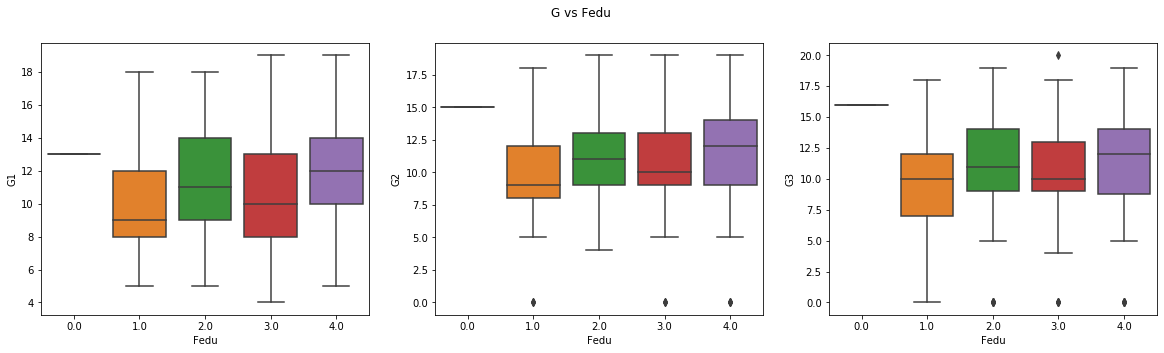

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs Fedu')

sns.boxplot(ax=axes[0], data=df, x="Fedu", y="G1")
sns.boxplot(ax=axes[1], data=df, x="Fedu", y="G2")
sns.boxplot(ax=axes[2], data=df, x="Fedu", y="G3")

**Comentario:** Los alumnos que tienen padres con mayor nivel educacional, tiene una mediana mayor en notas

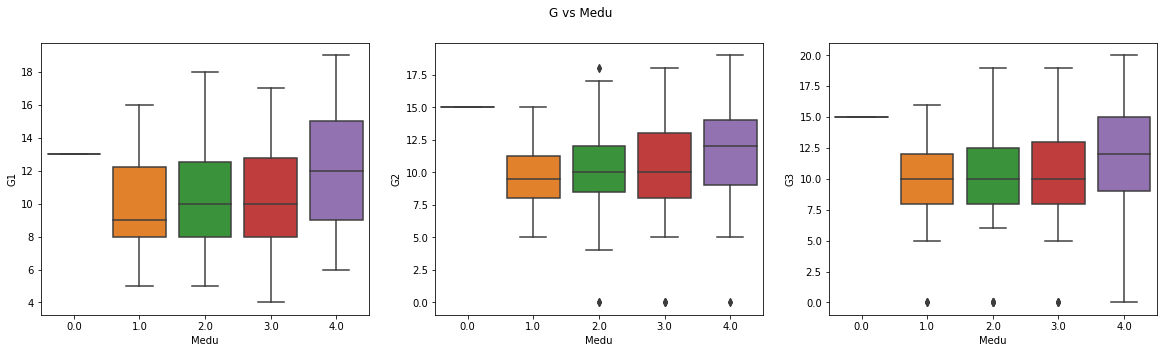

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs Medu')

sns.boxplot(ax=axes[0], data=df, x="Medu", y="G1")
sns.boxplot(ax=axes[1], data=df, x="Medu", y="G2")
sns.boxplot(ax=axes[2], data=df, x="Medu", y="G3")

**Comentario:** Los alumnos que tienen madres con mayor nivel educacional, tiene una mediana mayor en notas, igual que en el caso de los padres

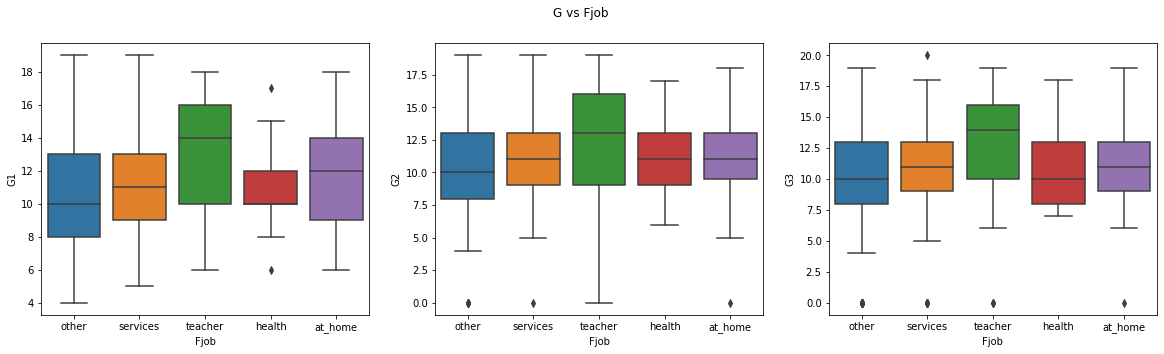

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs Fjob')

sns.boxplot(ax=axes[0], data=df, x="Fjob", y="G1")
sns.boxplot(ax=axes[1], data=df, x="Fjob", y="G2")
sns.boxplot(ax=axes[2], data=df, x="Fjob", y="G3")

**Comentario:** Los alumnos que tienen padres con tienen trabajo como profesor, tiene una mediana mayor en notas.

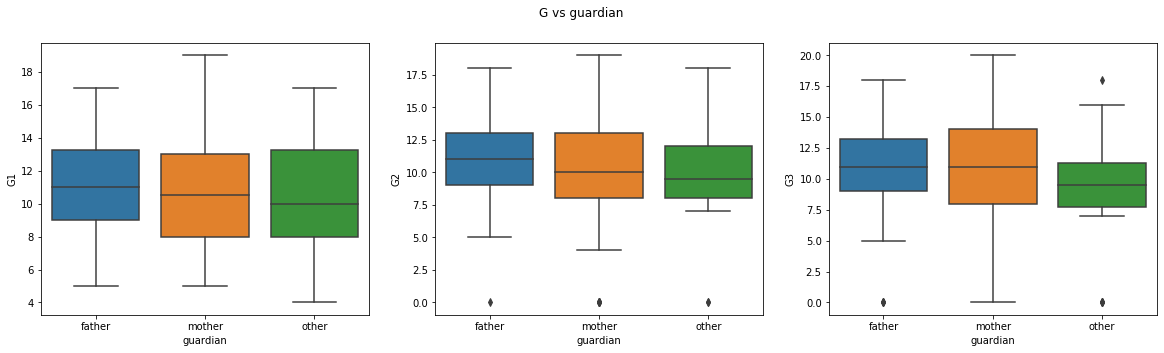

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs guardian')

sns.boxplot(ax=axes[0], data=df, x="guardian", y="G1")
sns.boxplot(ax=axes[1], data=df, x="guardian", y="G2")
sns.boxplot(ax=axes[2], data=df, x="guardian", y="G3")

**Comentario:** Los alumnos en G3 tienen notas parecidas si tienen de apoderado al papa o la mama, pero si es baja en otros.

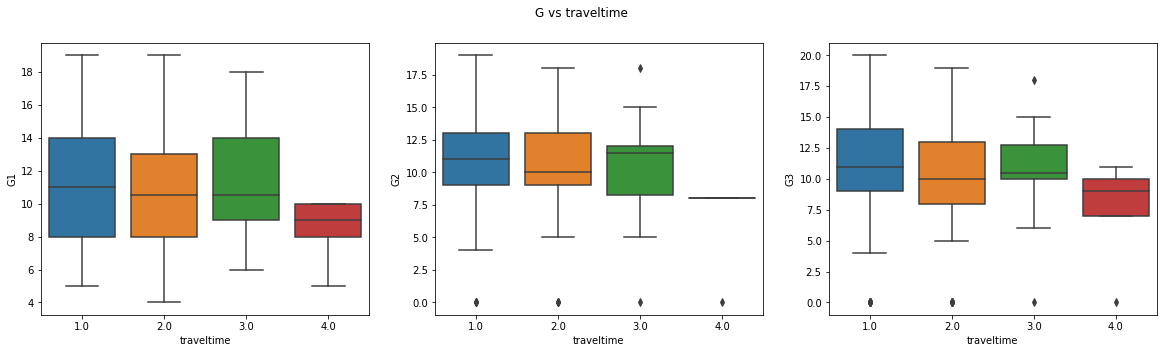

In [ ]:
"""○ 1 si es menos de 15 min, ○ 2 si es de 15 a 30 min, ○ 3 si es de 30 min. a 1 hora, ○ 4 - si es más de 1 hora)."""

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs traveltime')

sns.boxplot(ax=axes[0], data=df, x="traveltime", y="G1")
sns.boxplot(ax=axes[1], data=df, x="traveltime", y="G2")
sns.boxplot(ax=axes[2], data=df, x="traveltime", y="G3")

**Comentario:** Hubo un cambio entre los semestres, pensaria que siempre hubiera sido igual

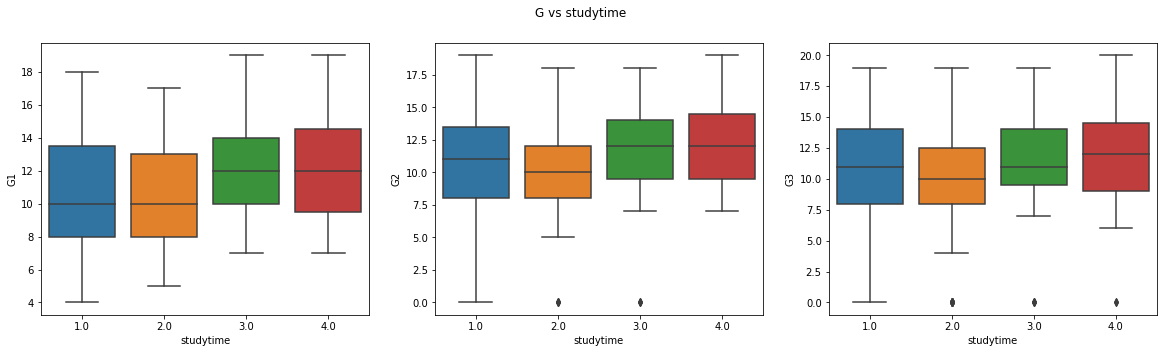

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs studytime')

sns.boxplot(ax=axes[0], data=df, x="studytime", y="G1")
sns.boxplot(ax=axes[1], data=df, x="studytime", y="G2")
sns.boxplot(ax=axes[2], data=df, x="studytime", y="G3")

**Comentario:** Hubo un cambio entre los semestres, subieron las notas en G2 y tambien bajo la dispersion de los datos

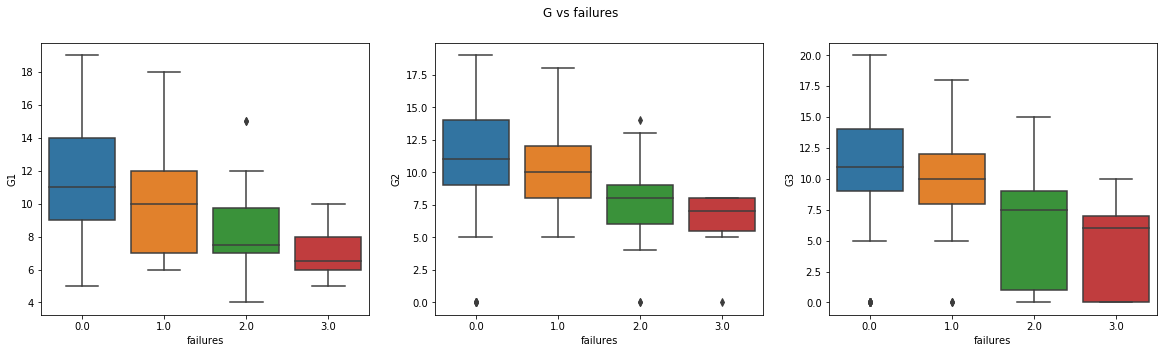

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs failures')

sns.boxplot(ax=axes[0], data=df, x="failures", y="G1")
sns.boxplot(ax=axes[1], data=df, x="failures", y="G2")
sns.boxplot(ax=axes[2], data=df, x="failures", y="G3")

**Comentario:** Hubo un cambio entre los semestres, subieron las notas en G2 y tambien bajo la dispersion de los datos

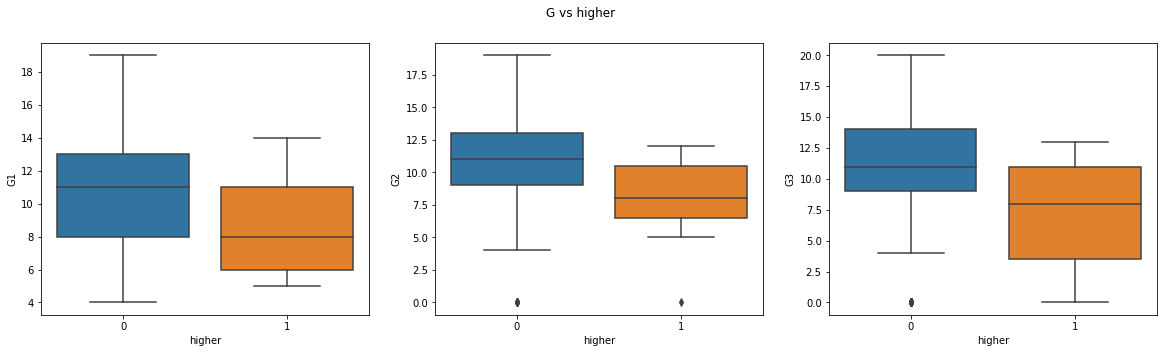

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs higher')

sns.boxplot(ax=axes[0], data=df, x="higher", y="G1")
sns.boxplot(ax=axes[1], data=df, x="higher", y="G2")
sns.boxplot(ax=axes[2], data=df, x="higher", y="G3")

**Comentario:** Aca se nota que tienen mejores notas los que piensan seguir estudiando

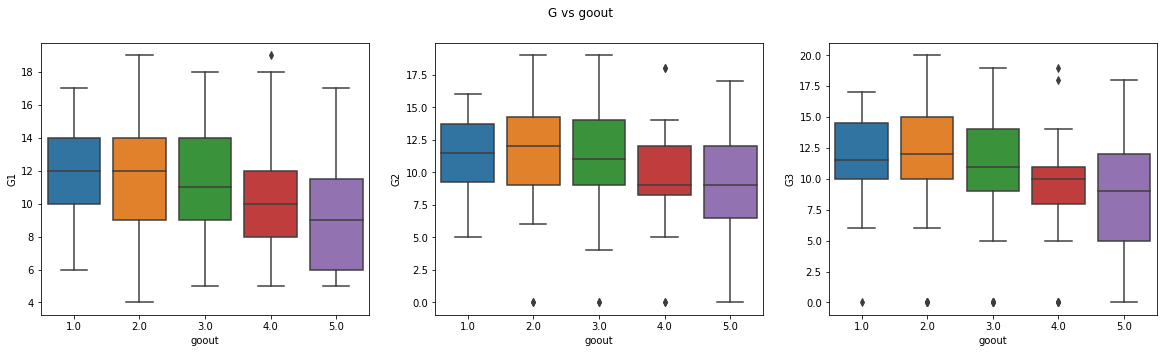

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs goout')

sns.boxplot(ax=axes[0], data=df, x="goout", y="G1")
sns.boxplot(ax=axes[1], data=df, x="goout", y="G2")
sns.boxplot(ax=axes[2], data=df, x="goout", y="G3")

**Comentario:** Los que tienen mas salidas con amigos tienen una mediana mas baja

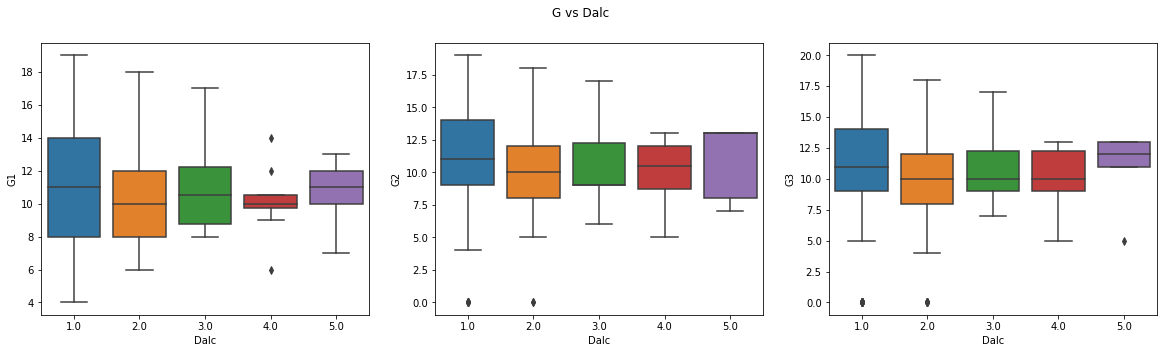

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs Dalc')

sns.boxplot(ax=axes[0], data=df, x="Dalc", y="G1")
sns.boxplot(ax=axes[1], data=df, x="Dalc", y="G2")
sns.boxplot(ax=axes[2], data=df, x="Dalc", y="G3")

**Comentario:** Los que tienen mas salidas con amigos tienen una mediana mas baja

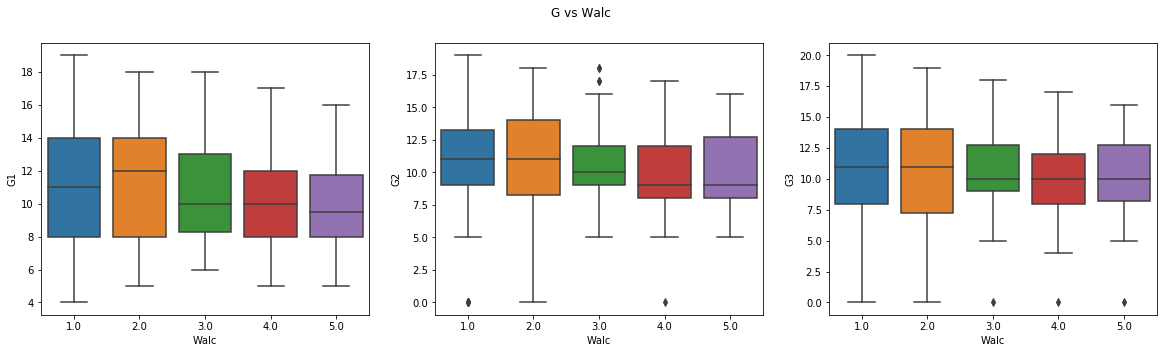

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs Walc')

sns.boxplot(ax=axes[0], data=df, x="Walc", y="G1")
sns.boxplot(ax=axes[1], data=df, x="Walc", y="G2")
sns.boxplot(ax=axes[2], data=df, x="Walc", y="G3")

**Comentario:** Los que tienen mas salidas con amigos tienen una mediana mas baja

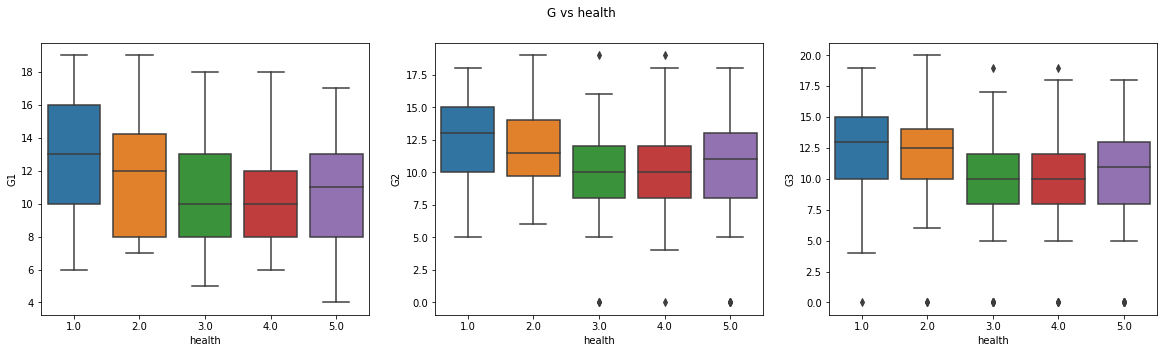

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  
fig.suptitle('G vs health')

sns.boxplot(ax=axes[0], data=df, x="health", y="G1")
sns.boxplot(ax=axes[1], data=df, x="health", y="G2")
sns.boxplot(ax=axes[2], data=df, x="health", y="G3")

**Comentario:** Los que tienen mal estado estado de salud tienen mejores notas, aunque supongo que no siempre son los mismos

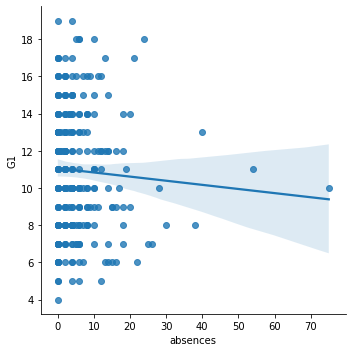

In [ ]:
sns.lmplot(x="absences", y="G1", data=df)

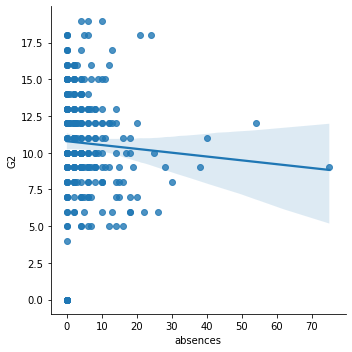

In [ ]:
sns.lmplot( data=df, x="absences", y="G2")


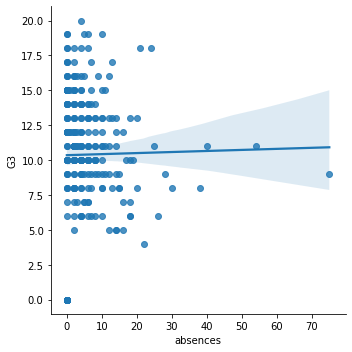

In [ ]:
sns.lmplot( data=df, x="absences", y="G3")

**Comentario:** Al parecer se mantienen constate al tener aumento de asistencias, pero se nota que hay una acumulacion en las ausencias bajas

- Las variables que no estan graficas, eran porque tenian una mediana o distribucion parecida, como es solo inspeccion visual es dficil ver si son diferencias estadisticamente significativas sin hacer docimas de hipotesis